In [ ]:
import tensorflow as tf
import keras
import sys
from matplotlib import pyplot
from keras.models import Sequential, load_model, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.layers import Dense, Input, Conv2DTranspose
from tensorflow.keras.layers import Flatten, Add, AveragePooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
from keras.initializers import glorot_uniform
from keras.activations import relu, softmax
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from keras import backend as K
from sklearn.metrics import confusion_matrix
from matplotlib import animation, rc
import matplotlib.patches as mpatches
from IPython.display import HTML, display, clear_output, SVG
from tensorflow.keras.optimizers import Adadelta
import ipywidgets as widgets
from tensorflow.keras.applications.resnet50 import ResNet50
import random

In [ ]:
import numpy as np
from scipy import stats

In [ ]:

def load_dataset():
	# load dataset

	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [ ]:
def model():
	base_model = ResNet50(include_top=False, input_shape=(128, 128, 3), pooling='max')
	
	# for layer in base_model.layers:
	# 	layer.trainable = False
	model = Sequential()
	model.add(Conv2DTranspose(3, (3, 3), strides=2, padding='same', activation='relu', input_shape=(32,32,3)))
	model.add(BatchNormalization())
	model.add(Conv2DTranspose(3, (3, 3), strides=2, padding='same', activation='relu'))
	model.add(BatchNormalization())
	model.add(base_model)
	model.add(Flatten())
	model.add(Dense(1024, activation='relu'))
	model.add(Dense(512, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	
	return model

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [ ]:
def preprocess_image_input(input_images):
	input_images = input_images.astype('float32')
	output_ims = tf.keras.applications.resnet50.preprocess_input(input_images)
	return output_ims


In [ ]:
x_train, y_train, x_test, y_test = load_dataset()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
x_train = preprocess_image_input(x_train)
x_test = preprocess_image_input(x_test)
# x_train,x_test = prep_pixels(x_train,x_test)
# x_test = preprocess_image_input(x_test)

In [ ]:
model = model()
# x_train = x_train[0:1000]
# x_test = x_test[0:1000]
# y_train = y_train[0:1000]
# y_test = y_test[0:1000]
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 20, verbose = True, batch_size=64)

94781440/94765736 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
782/782 [==============================] - 119s 135ms/step - loss: 0.9049 - accuracy: 0.7015 - val_loss: 1.8692 - val_accuracy: 0.4341
Epoch 2/20
782/782 [==============================] - 104s 133ms/step - loss: 0.3236 - accuracy: 0.8897 - val_loss: 0.3658 - val_accuracy: 0.8722
Epoch 3/20
782/782 [==============================] - 104s 133ms/step - loss: 0.1323 - accuracy: 0.9552 - val_loss: 0.3818 - val_accuracy: 0.8853
Epoch 4/20
782/782 [==============================] - 104s 132ms/step - loss: 0.0493 - accuracy: 0.9841 - val_loss: 0.4338 - val_accuracy: 0.8872
Epoch 5/20
782/782 [==============================] - 104s 132ms/step - loss: 0.0266 - accuracy: 0.9917 - val_loss: 0.4649 - val_accuracy: 0.8889
Epoch 6/20
782/782 [==============================] - 104s 132ms/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 0.4932 - val_accuracy: 0.8904
Epoch 7/20
782/782 [==============================] - 104s 133ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.4976 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


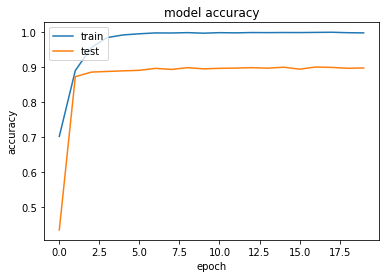

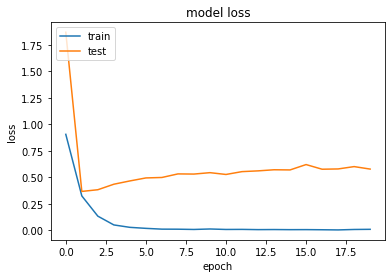

In [ ]:
print(hist.history.keys())
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/Classroom/TML outputs /base_model.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
new_model =  tf.keras.models.load_model('/content/drive/MyDrive/Classroom/TML outputs /base_model.h5')

In [ ]:
new_model.evaluate(x_test, y_test)

313/313 [==============================] - 9s 27ms/step - loss: 0.5768 - accuracy: 0.8970


[0.5768340826034546, 0.8970000147819519]

In [ ]:
new_model.evaluate(x_train,y_train)

1563/1563 [==============================] - 42s 27ms/step - loss: 6.8003e-04 - accuracy: 0.9999


[0.0006800255505368114, 0.9999200105667114]

In [ ]:
import numpy as np
import sklearn.metrics as metrics
x_temp = np.vstack((x_train, x_test))
y_temp = np.vstack((y_train, y_test))

inv = np.ones((x_train.shape[0],1))
outv = np.zeros((x_test.shape[0],1))
in_out_temp = np.vstack((inv, outv))

assert x_temp.shape[0] == y_temp.shape[0]
sz = 2000
if sz > x_temp.shape[0]:
    sz = x_temp.shape[0]

perm = np.random.permutation(x_temp.shape[0])
perm = perm[0:sz]
x_targets = x_temp[perm,:]
y_targets = y_temp[perm,:]

in_out_targets = in_out_temp[perm,:]


pv = model.predict(x_targets)


In [ ]:
best_t = 0.0
best_acc = 0.0
best_adv = 0.0
for i in range(1,100,1):
  threshold =i/100
  in_or_out_pred = np.zeros((x_targets.shape[0],))
  for i in range(0,len(pv)):
      largest_index = np.argmax(pv[i])
      if pv[i][largest_index] > threshold:
          in_or_out_pred[i] = 1
      else:
          in_or_out_pred[i] = 0

  cm = metrics.confusion_matrix(in_out_targets, in_or_out_pred)
  accuracy = np.trace(cm) / np.sum(cm.ravel())
  tn, fp, fn, tp = cm.ravel()
  tpr = tp / (tp + fn)
  fpr = fp / (fp + tn)
  advantage = tpr - fpr
  # print(accuracy)
  # print(advantage)
  if advantage > best_adv:
    best_acc = accuracy
    best_adv = advantage

In [ ]:

print(best_acc)
print(best_adv)

0.85
0.16772489240651767
